  Created wheel for TwitterAPI: filename=TwitterAPI-2.6.9-cp37-none-any.whl size=13018 sha256=52135e61e7a197d26025da291cc95645aa0ece3807c39db9e00eb8861be26435
  Stored in directory: /root/.cache/pip/wheels/a5/0e/95/20cc6509adc448f64c2dd616bdc6fd25ce147b60ecfbc2c322
Successfully built TwitterAPI
     |████████████████████████████████| 74.6MB 50kB/s 
ERROR: Could not find a version that satisfies the requirement orca==1.2.1 (from versions: 1.0.0, 1.1.0, 1.2.0, 1.3.0, 1.4.0, 1.5.1, 1.5.3, 1.5.4)
ERROR: No matching distribution found for orca==1.2.1
     |████████████████████████████████| 11.5MB 3.6MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
--2021-02-26 18:45:29--  https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 F

'hello world'

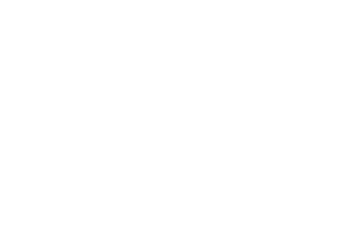

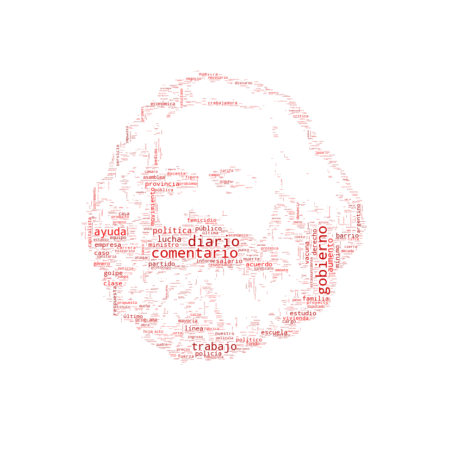

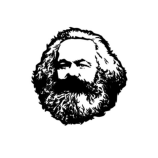

In [ ]:
!pip install TwitterAPI
!pip install -U kaleido
!pip install orca==1.2.1
!pip install plotly==4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4
import requests
import json
from operator import itemgetter
from bs4 import BeautifulSoup
import networkx as nx
from TwitterAPI import TwitterAPI
import urllib
from math import pi
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import io
from io import BytesIO
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random
from plotly.offline import init_notebook_mode, iplot
import plotly.express as ex
import plotly.graph_objs as go
outliers = ["Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo',  'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de']

def make_edge(x, y, text, width):
    return  go.Scatter(x         = x,
                       y         = y,
                       line      = dict(width = width,
                                   color = 'cornflowerblue'),
                       hoverinfo = 'text',
                       text      = ([text]),
                       mode      = 'lines')

def seccionLinks(url):
  linkanterior = ""
  linksadevolver = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  lista = soup.find_all('a')
  indice =0
  while indice<len(lista):
    link = lista[indice].get('href')
    if link != None:
      if link != linkanterior:
        linkanterior=link
        linksadevolver.append(link)
    indice+=1
  return linksadevolver


def palabrasArticulo(url):
  palabras = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  valido = False
  #juan = json.loads(soup.find('script',type="application/ld+json").text)
  #palabras+=(separaPalabras(juan["headline"]))
  ##palabras+=(separaPalabras(juan["alternativeHeadline"]))
  #palabras+=(separaPalabras(juan["articleBody"]))
  juan = soup.find_all('p')
  roca = []
  for items in juan:
    if items.get_text() == 'Si sos de  Zona Norte del Gran Buenos Aires: \r\nPonete en contacto y organizate con el PTS en el Frente de Izquierda o con Pan y Rosas en tu trabajo, lugar de estudio o barrio.':
      valido = False
    if valido:  
      try:
        palabras+=(separaPalabras(items.get_text()))
      except:
        print("no")
    if items.get_text() == 'SUBIR':
      valido = True
  return palabras
  #print(roca)

def palabrasArticuloBis(url):
  frases = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  valido = False
  juan = soup.find_all('p')
  roca = []
  for items in juan:
    if items.get_text() == 'Si sos de  Zona Norte del Gran Buenos Aires: \r\nPonete en contacto y organizate con el PTS en el Frente de Izquierda o con Pan y Rosas en tu trabajo, lugar de estudio o barrio.':
      valido = False
    if valido:  
      try:
        frases+=(separaFrases(items.get_text()))
      except:
        print("no")
    if items.get_text() == 'SUBIR':
      valido = True
  return frases
  
def separaPalabras(frase):
  palabras=[]
  i =0
  while i<len(frase):
    if frase[i].isalpha():
      h=i+1
      while h<len(frase):
        if h==len(frase)-1:
          if frase[h].isalpha():
            if frase[i:h+1].lower() not in outliers:
              palabras.append(frase[i:h+1].lower())
          else :
            if frase[i:h].lower() not in outliers:
              palabras.append(frase[i:h].lower())
          i = len(frase)
        elif frase[h].isalpha()!= True:
          if frase[i:h].lower() not in outliers:
            palabras.append(frase[i:h].lower())
          i = h         
          h = len(frase)
        h+=1
    i+=1
  return palabras

  def palabrasMaspalabrasMenos(palabras):
    tuplaPalabras = []
    i = 0
    while i<len(palabras):
      palabreta = palabras[i]
    loEncontro = False
    h = 0
    while h<len(tuplaPalabras):
      if palabreta==tuplaPalabras[h][0]:
        loEncontro = True
        nuevatupla = (tuplaPalabras[h][0],tuplaPalabras[h][1]+1)
        tuplaPalabras[h]= nuevatupla
        h = len(tuplaPalabras)
      h+=1
    if loEncontro == False:
      tupla = (palabreta,1)
      tuplaPalabras.append(tupla)
    i+=1
  return sorted(tuplaPalabras, key=itemgetter(1))


def separaFrases(frase):
  palabras=[]
  i =0
  while i<len(frase):
    h=i+1
    while h<len(frase):
      if h==len(frase)-1:
        palabras.append(frase[i:h])
        i = len(frase)
      elif frase[h]== ".":
        palabras.append(frase[i:h])
        i = h       
        h = len(frase)
      h+=1
    i+=1
  return palabras

def relacionaPalabras(frase,relacionadorDePalabras):
  i = 0
  while i < len(frase)-1:
    h = i+1
    while h < len(frase):
      if frase[i] in relacionadorDePalabras and frase[h] in relacionadorDePalabras[frase[i]]:
        relacionadorDePalabras[frase[i]][frase[h]] +=1
        relacionadorDePalabras[frase[h]][frase[i]] +=1
      else:
        if frase[i] in relacionadorDePalabras:
          relacionadorDePalabras[frase[i]][frase[h]] = 1
          if frase[h] in relacionadorDePalabras:
            relacionadorDePalabras[frase[h]][frase[i]] = 1
          else:
            relacionadorDePalabras[frase[h]] = {}
            relacionadorDePalabras[frase[h]][frase[i]] = 1
        else:
          relacionadorDePalabras[frase[i]] = {}
          relacionadorDePalabras[frase[i]][frase[h]] = 1
          if frase[h] in relacionadorDePalabras:
            relacionadorDePalabras[frase[h]][frase[i]] = 1
          else:
            relacionadorDePalabras[frase[h]] = {}
            relacionadorDePalabras[frase[h]][frase[i]] = 1
      h+=1
    i+=1

def palabrasMaspalabrasMenos(palabras):
  tuplaPalabras = []
  i = 0
  while i<len(palabras):
    palabreta = palabras[i]
    loEncontro = False
    h = 0
    while h<len(tuplaPalabras):
      if palabreta==tuplaPalabras[h][0]:
        loEncontro = True
        nuevatupla = (tuplaPalabras[h][0],tuplaPalabras[h][1]+1)
        tuplaPalabras[h]= nuevatupla
        h = len(tuplaPalabras)
      h+=1
    if loEncontro == False:
      tupla = (palabreta,1)
      tuplaPalabras.append(tupla)
    i+=1
  return sorted(tuplaPalabras, key=itemgetter(1))

def color_func_clarin(word, font_size, position, orientation, random_state=None,**kwargs):
  return "hsl(360, 100%%, %d%%)" % random.randint(30,50)



def hello_world(request):
  x = datetime.datetime.now()
  fechaHoy = str(x.day)+"/"+str(x.month)+"/"+str(x.year)
    
  listadeerrores = ""
  outliers = ["Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo',  'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de']
  secciones = {"Politica":[],"Economia":[],"Generos-y-Sexualidades":[],"Internacional":[],"Sociedad":[],"deportes":[],"Cultura":[],"Mundo-Obrero":[]}
  total = []
  relacionador = {}
  for keys in secciones:
    articulos = seccionLinks('https://www.laizquierdadiario.com/'+keys)
    for articulo in articulos:
      try:
        frases = palabrasArticuloBis("https://www.laizquierdadiario.com/"+articulo)
        for frase in frases:
          relacionaPalabras(separaPalabras(frase),relacionador)
        secciones[keys] += palabrasArticulo("https://www.laizquierdadiario.com/"+articulo)
        total += palabrasArticulo("https://www.laizquierdadiario.com/"+articulo)
      except Exception as error:
        listadeerrores+= str(error)
        print(listaderrores)


        
  for keys in secciones:
    secciones[keys] = palabrasMaspalabrasMenos(secciones[keys])
  total = palabrasMaspalabrasMenos(total)
    

  registrador = {}
  eliminar = []
  miNet = nx.Graph()
  listadeGrandes = []
  diccionarioTamNodos = {}

  for palabra in relacionador:
    tamNodo = 0
    for keys in secciones:
      for tuplas in secciones[keys]:
        if tuplas[0] == palabra:
          tamNodo+= tuplas[1]
    diccionarioTamNodos[palabra] = tamNodo
    if len(listadeGrandes)<16:
        listadeGrandes.append(palabra)
    else:
      menor = palabra
      posicion = 100
      for palabre in listadeGrandes:
        if diccionarioTamNodos[palabre]<diccionarioTamNodos[menor]:
          menor = palabre
          posicion = listadeGrandes.index(palabre)
      if menor != palabra:
        listadeGrandes[posicion]=palabra
  
  
  for palabras in listadeGrandes:
    miNet.add_node(palabras,size = diccionarioTamNodos[palabras]/50)

  indice = 0
  while indice < len(listadeGrandes)-1:
    indice2 = indice+1
    while indice2 < len(listadeGrandes):
      tamTrace = 0
      if listadeGrandes[indice2] in relacionador[listadeGrandes[indice]]:
        if relacionador[listadeGrandes[indice]][listadeGrandes[indice2]]> min(diccionarioTamNodos[listadeGrandes[indice]]/50,diccionarioTamNodos[listadeGrandes[indice2]]/50):
          tamTrace = min(diccionarioTamNodos[listadeGrandes[indice]]/50,diccionarioTamNodos[listadeGrandes[indice2]]/50)
        else:
          tamTrace = relacionador[listadeGrandes[indice]][listadeGrandes[indice2]]
        miNet.add_edge(listadeGrandes[indice], listadeGrandes[indice2], weight = (tamTrace))
      indice2+=1
    indice+=1

  pos_ = nx.spring_layout(miNet)

  edge_trace = []
  for edge in miNet.edges():
    char_1 = edge[0]
    char_2 = edge[1]
    x0, y0 = pos_[char_1]
    x1, y1 = pos_[char_2]
    text   = char_1 + '--' + char_2 + ': ' + str(miNet.edges()[edge]['weight'])
    trace  = make_edge([x0, x1, None], [y0, y1, None], text, width = 0.3*miNet.edges()[edge]['weight']**1.75)
    edge_trace.append(trace)

  # Make a node trace
  node_trace = go.Scatter(x         = [],
                          y         = [],
                          text      = [],
                          textposition = "top center",
                          textfont_size = 10,
                          mode      = 'markers+text',
                          hoverinfo = 'none',
                          marker    = dict(color = [],
                                          size  = [],
                                          line  = None))

   # For each node in midsummer, get the position and size and add to the node_trace
  for node in miNet.nodes():
    x, y = pos_[node]
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    node_trace['marker']['color'] += tuple(['cornflowerblue'])
    node_trace['marker']['size'] += tuple([5*miNet.nodes()[node]['size']])
    node_trace['text'] += tuple(['<b>' + node + '</b>'])

  # Customize layout
  layout = go.Layout(
      #paper_bgcolor='rgba(0,0,0,0)',
      #plot_bgcolor='rgba(0,0,0,0)', 
      xaxis =  {'showgrid': False, 'zeroline': False}, # no gridlines
      yaxis = {'showgrid': False, 'zeroline': False}, # no gridlines
  )# Create figure
  fig = go.Figure(layout = layout)# Add all edge traces
  print("los nodos estan")
  for r in edge_trace:
    fig.add_trace(r)

      # Add node trace
  fig.add_trace(node_trace)# Remove legend
  fig.update_layout(showlegend = False)# Remove tick labels
  fig.update_xaxes(showticklabels = False)
  fig.update_yaxes(showticklabels = False)

  img_bytes = fig.to_image(format="png")
  data = img_bytes
  statustw = 'Relacion de Palabras del dia de La Izquierda diario'
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})   

  #arranca WordCloud
    
  url = "https://i.ibb.co/HXmGfs9/marx-final-retocada.jpg"
  response = requests.get(url)
  clarin_mask = Image.open(BytesIO(response.content))
  stopwords = set(STOPWORDS)
  for word in outliers:
    stopwords.add(word)
  text = ""
  k=  len(total)-1
  while k>0 and k>(len(total)-1995):
    tupla= total[k]
    stringaux = " "+ tupla[0]        
    text+= stringaux
    k-=1
  clarin_mask = np.asanyarray(clarin_mask)


  
  try:
    wc_clarin = WordCloud(min_font_size = 1, background_color="white",color_func= color_func_clarin, max_words=2000,mask= clarin_mask,
              stopwords=stopwords, contour_width=5, contour_color='white')
    wc_clarin.generate(text)
    
  except Exception as e:
    return listadeerrores
    
    

  plt.axis("off")
    # Ajustar el tamaño acá, en el figsize.
  plt.figure(figsize = (15,8))
  plt.imshow(wc_clarin, cmap=plt.cm.gray, interpolation='bilinear')
  plt.axis("off")
  figfile = BytesIO()
  plt.savefig(figfile, format='png')
  data = figfile
  figfile.seek(0)  # rewind the data
  statustw = 'WordCloud La Izquierda Diario del día' 
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})   


  ## Insteramos logo de Clarín

  fig = plt.figure(figsize=(10,10))
  #ax = plt.subplot(121)

  url = "https://i.ibb.co/HXmGfs9/marx-final-retocada.jpg"
  image = io.imread(url)
  #plt.imshow(image)
  #ax.axis("off")

  newax = fig.add_axes([0.10, 0.10, 0.20, 0.20], anchor='NE', zorder=-1)
  newax.imshow(image)
  newax.axis('off')

  ## Secciones
  total = 0

  secciones2 = {}
  for keys in secciones:
    secciones2[keys] = 0
    for items in secciones[keys]:
      secciones2[keys]+= items[1]
    total+= secciones2[keys]
  for keys in secciones2:
    secciones2[keys] = secciones2[keys] * 100 / total
  secciones3 = {}
  for keys in secciones2:
    secciones3[keys] = []
    secciones3[keys].append(secciones2[keys])
  
  df = pd.DataFrame({
    'group': ['LaIzquierdaDiario'],

  })
  for keys in secciones3:
    df[keys] = secciones3[keys]

  
  # number of variable
  categories=list(df)[1:]
  N = len(categories)
  
  # We are going to plot the first line of the data frame.
  # But we need to repeat the first value to close the circular graph:
  values=df.loc[0].drop('group').values.flatten().tolist()
  values += values[:1]
  values
  
  # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
  # Initialise the spider plot

  #ax = plt.subplot(111, polar=True)
  fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

  # Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories, color='black', size=20)


  # Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([10,20,30], ["10","20","30"], color="grey", size=10)
  plt.ylim(0,20)
  
  # Plot data
  ax.plot(angles, values, linewidth=1, linestyle='solid',color='red')
  
  # Fill area
  ax.fill(angles, values, 'b',color="red", alpha=0.1)


  ## Acá le cambiamos el color de fondo
  #fig.set_facecolor("red")


  ## Acomodamos las secciones

  for label,i in zip(ax.get_xticklabels(),range(0,len(angles))):

      angle_rad=angles[i]
      if angle_rad <= pi/2:
          ha= 'left'
          va= "bottom"

      elif pi/2 < angle_rad <= pi:
          ha= 'right'
          va= "bottom"

      elif pi < angle_rad <= (3*pi/2):
          ha= 'right'
          va= "top"  

      else:
          ha= 'right'
          va= "bottom"

      label.set_verticalalignment(va)
      label.set_horizontalalignment(ha)
  
  figfile = BytesIO()
  plt.savefig(figfile, format='png')
  data = figfile
  figfile.seek(0)  # rewind the data

  plt.close(fig)
  statustw = 'Radar de Palabras del dia La Izquierda Diario'
  r = api.request('statuses/update_with_media', {'status': statustw}, {'media[]':data})
  return "hello world"

hello_world("marx")

In [ ]:
#!pip install TwitterAPI

### Por lo pronto, analizar y contrastar diarios, visualizando palabras claves y resultados

In [ ]:
# Importamos la librería Requests
import requests
import json
import re
from operator import itemgetter, attrgetter, methodcaller

## Lo hacemos sopa, bro

In [ ]:
#!pip install bs4
from bs4 import BeautifulSoup

In [ ]:
outliers = ["Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'muchos', 'decisión', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo', 'bien', 'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de']

Entra a una seccion y devuelve los links de los articulos de esa seccion

1.   List item
2.   List item



In [ ]:
def seccionLinks(url):
  linkanterior = ""
  linksadevolver = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  lista = soup.find_all('a')
  indice =0
  while indice<len(lista):
    link = lista[indice].get('href')
    if link != None:
      if link != linkanterior:
        linkanterior=link
        linksadevolver.append(link)
    indice+=1
  return linksadevolver


In [ ]:
#palabrasMaspalabrasMenos(palabrasArticulo("http://www.laizquierdadiario.com/Trabajador-de-Burger-King-Estoy-cansado-de-la-actitud-con-la-que-se-maneja-la-patronal"))

Devuelve las palabras de un articulo

In [ ]:
def palabrasArticulo(url):
  palabras = []
  req = requests.get(url)
  soup = BeautifulSoup(req.text, "lxml")
  valido = False
  #juan = json.loads(soup.find('script',type="application/ld+json").text)
  #palabras+=(separaPalabras(juan["headline"]))
  ##palabras+=(separaPalabras(juan["alternativeHeadline"]))
  #palabras+=(separaPalabras(juan["articleBody"]))
  juan = soup.find_all('p')
  roca = []
  for items in juan:
    if items.get_text() == 'Si sos de  Zona Norte del Gran Buenos Aires: \r\nPonete en contacto y organizate con el PTS en el Frente de Izquierda o con Pan y Rosas en tu trabajo, lugar de estudio o barrio.':
      valido = False
    if valido:  
      try:
        palabras+=(separaPalabras(items.get_text()))
      except:
        print("no")
    if items.get_text() == 'SUBIR':
      valido = True
  return palabras
  #print(roca)

Separa las frases en palabras

In [ ]:
def separaPalabras(frase):
  palabras=[]
  i =0
  while i<len(frase):
    if frase[i].isalpha():
      h=i+1
      while h<len(frase):
        if h==len(frase)-1:
          if frase[h].isalpha():
            if frase[i:h+1].lower() not in outliers:
              palabras.append(frase[i:h+1].lower())
          else :
            if frase[i:h].lower() not in outliers:
              palabras.append(frase[i:h].lower())
          i = len(frase)
        elif frase[h].isalpha()!= True:
          if frase[i:h].lower() not in outliers:
            palabras.append(frase[i:h].lower())
          i = h         
          h = len(frase)
        h+=1
    i+=1
  return palabras


Retorna cuantas veces aparece cada palabra 

In [ ]:
def palabrasMaspalabrasMenos(palabras):
  tuplaPalabras = []
  i = 0
  while i<len(palabras):
    palabreta = palabras[i]
    loEncontro = False
    h = 0
    while h<len(tuplaPalabras):
      if palabreta==tuplaPalabras[h][0]:
        loEncontro = True
        nuevatupla = (tuplaPalabras[h][0],tuplaPalabras[h][1]+1)
        tuplaPalabras[h]= nuevatupla
        h = len(tuplaPalabras)
      h+=1
    if loEncontro == False:
      tupla = (palabreta,1)
      tuplaPalabras.append(tupla)
    i+=1
  return sorted(tuplaPalabras, key=itemgetter(1))

In [ ]:
secciones = {"Politica":[],"Economia":[],"Generos-y-Sexualidades":[],"Internacional":[],"Sociedad":[],"deportes":[],"Cultura":[],"Mundo-Obrero":[]}

Usa las funciones definidas anteriormente para analizar la pagina de clarin y agregarle a cada seccion una lista de palabras y la cant de veces que aparece

In [ ]:
#tarda unos 5 mins en correr porque agarra todo clarin
for keys in secciones:
  articulos = seccionLinks('http://www.laizquierdadiario.com/'+keys)
  for articulo in articulos:
    try:
      secciones[keys] += palabrasArticulo("http://www.laizquierdadiario.com/"+articulo)   
    except:
      print(articulo)
for keys in secciones:
  secciones[keys] = palabrasMaspalabrasMenos(secciones[keys])

Cosas para Sankey:

In [ ]:
sources = []
targets = []
values = []
labels = []
labels.append("LaIzquierdaDiario")
for keys in secciones:
  labels.append(keys)
  sources.append(0)
  targets.append(len(labels)-1)
  cantPalabras = 0
  #print(str(len(secciones[keys])))
  for palabras in secciones[keys]:
    cantPalabras+= palabras[1]
  values.append(cantPalabras)
j=1
for keys in secciones: 
  if len(secciones[keys])>=10:
    i = 0
    while i<5:
      sources.append(j)
      joan = secciones[keys] 
      rudo = joan[len(secciones[keys])-1-i]
      labels.append(rudo[0])
      targets.append(len(labels)-1)
      values.append(rudo[1])
      i+=1
  else:
    print(keys)
  j+=1

In [ ]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity

data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                              for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  labels,
      color =  data['data'][0]['node']['color']
    ),
    # Add links

    link = dict(
      source = sources,
      target =  targets,
      value =  values,
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()

### En palabras van a estar las palabras, mientras que en vecesqueaparece te aparece la cantidad de veces que aparece


##Armamos el DataFrame

In [ ]:
import pandas as pd

df = pd.DataFrame({
  "Palabras" : palabras
})



In [ ]:
cantPalabras

6188

### Retocamos rápidamente algunas cositas de los strings (más adelante tiré una regex...)

In [ ]:
df = df.applymap(lambda x: x.rstrip("."))
df = df.applymap(lambda x: x.rstrip(" "))
df = df.applymap(lambda x: x.rstrip("'"))

AttributeError: ignored

### Miramos con value_counts() las palabras más utilizadas

In [ ]:
top10= df["Palabras"].value_counts()

In [ ]:
top10

## Tiramos el top de frecuencias con su respectivo gráfico

In [ ]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')

top_N = 10

stopwords = nltk.corpus.stopwords.words('spanish')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# regex de reemplazo
Palabras = (df.Palabras
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

rslt = df.tail(5)
#pd.DataFrame(Counter(top10).most_common(top_N),
        #            columns=['Palabras', 'Frecuencia']).set_index('Palabras')
print(rslt)

# ploteo
rslt.plot.bar(x="Palabras", y= "Apariciones", rot=0, figsize=(12,6), width=0.8)

## Probamos WordClouds

In [ ]:
# Librerías
#!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

### Wordcloud grande

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text_wordcloud = df.tail(30)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text_wordcloud))
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Wordcloud chico

In [ ]:
wordcloud = WordCloud().generate(str(text_wordcloud))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud Clarín (en proceso) La idea es agarrar el logo de Clarín y su fuente y armar un wordcloud (fuente: Portada)

In [ ]:
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(str(text))
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    

In [ ]:
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import urllib
import requests
import matplotlib.pyplot as plt

In [ ]:
text = df.Palabras
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



In [ ]:
mask = np.array(Image.open(requests.get("https://imagizer.imageshack.com/img922/8283/jSbKW4.png", stream=True).raw))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(str(text))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## TreeMap (Falta columna en DataFrame de cuantas veces aparece y agregar en label en la función)


In [ ]:
# Librerías
#!pip install squarify
import matplotlib.pyplot as plt
import squarify

In [ ]:
import pandas as pd
squarify.plot(sizes=df['Palabras'], label=[] , alpha=.8 )
plt.axis('off')
plt.show() 

## WordCloud Marx

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import random
import numpy as np
import matplotlib.pyplot as plt
import os

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Seteamos palabras que no queremos que aparezcan
stopwords = set(STOPWORDS)
outliers = ("Palabras","lunes","martes","miércoles","miercoles","jueves","viernes","sábado","sabado,","domingo","dtype","Frecuencia",'buena', 'cinco', 'tan', 'camino',  'posible', 'local', 'junto' , 'final', 'iba',  'grupo', 'medida',  'explicó', 'dio', 'viernes',  'aún', 'estamos', 'lado', 'nueva', 'agregó', 'respecto', 'ella', 'partir',  'tema', 'zona', 'centro', 'hubo', 'tenemos', 'unos',  'hombre', 'sea', 'llegar', 'dentro', 'información', 'estas',  'veces', 'bajo', 'esos', 'entonces', 'nunca', 'hacia', 'sí', 'quedó', 'hecho', 'misma', 'mil', 'chicos', 'sigue', 'fin', 'decir', 'volver', 'allí', 'nada',  'quienes', 'importante', 'frente', 'estados', 'será', 'relación', 'pasó', 'poder', 'total', 'ir', 'debe', 'pueden',  'sino',  'otras', 'haber', 'través', 'causa', 'mes',  'dice', 'nuevo', 'mejor', 'ver', 'cuerpo', 'estar', 'tenía', 'casi', 'poco', 'primer', 'llegó', 'sólo', 'gente', 'cosas', 'estos', 'mayor', 'primera','algunos', 'mucho', 'forma', 'sido', 'siempre', 'hizo',  'va', 'algo', 'han', 'tienen',  'te', 'aires', 'medio', 'todas', 'él', 'horas', 'tras', 'ellos', 'meses', 'estaba', 'aunque', 'gran', 'antes', 'tener',  'fueron', 'les', 'us', 'menos', 'ante', 'esto', 'otra',  'tanto', 'e', 'pasado', 'solo', 'vida', 'manera', 'semana', 'ni', 'buenos', 'día', 'momento', 'luego', 'tiempo',  'otro', 'qué', 'mientras', 'mismo', 'martes', 'otros', 'cómo', 'tres', 'dólares', 'hacer', 'yo', 'contra', 'lunes', 'hace', 'nos', 'están','quien', 'además', 'así', 'lugar', 'uno', 'después', 'durante', 'mi', 'hoy', 'vez', 'año', 'días', 'según', 'país', 'esa', 'cada', 'ahora', 'personas', 'eso', 'puede', 'muy', 'parte', 'dijo', 'era', 'argentina', 'todos', 'ha', 'tiene', 'donde', 'porque', 'ser', 'ese', 'millones', 'todo', 'hasta', 'dos', 'había', 'esta', 'sin', 'son', 'está', 'cuando', 'ya', 'años', 'me', 'hay', 'también', 'entre', 'si', 'sobre', 'sus', 'desde', 'o', 'le', 'este', 'fue', 'pero', 'como', 'más', 'lo', 'su', 'al', 'es', 'no', 'para', 'una', 'con', 'las', 'por', 'un', 'quot', 'se', 'del', 'los', 'a', 'y', 'en', 'que','el','la','de')
stopwords.add(outliers)


# Que lea la imágen como máscara
marx_mask = np.array(Image.open(path.join(d, "marx.jpg")))

def color_func_marx(word, font_size, font_path, position, orientation, random_state=None):
    return "hsl(360, 100%%, %d%%)" % random.randint(30, 50)

wc_marx = WordCloud(font_path= fuente ,min_font_size = 1,color_func= color_func_marx, background_color="white", max_words=5000, mask=marx_mask,
               stopwords=stopwords, contour_width=1, contour_color='white', width=marx_mask.shape[1],
               height= marx_mask.shape[0])

# Generamos el WordCloud
wc_marx.generate(text)

# Ploteado
#plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
# Ajustar el tamaño acá, en el figsize.
plt.figure(figsize = (25,15))
plt.imshow(wc_marx, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()